In [1]:
import pandas as pd
from collections import Counter

user_list = [
    # twitter
    './twitter/user_table.tsv',
    # amazon
    './amazon/user_table.tsv',
    # yelp hotel
    './yelp_hotel/user_table.tsv',
    # yelp restaurant
    './yelp_rest/user_table.tsv',
]

data_list = [
    # twitter
    './twitter/twitter.tsv',
    # amazon
    './amazon/amazon.tsv',
    # yelp hotel
    './yelp_hotel/yelp_hotel.tsv',
    # yelp restaurant
    './yelp_rest/yelp_rest.tsv',
]


"""
    Label distribution
"""
def label_dist(datap):
    print('Working on: ' + datap)
    labels = []
    with open(datap) as dfile:
        dfile.readline()
        for line in dfile:
            line = line.strip().split('\t')
            labels.append(float(line[-1]))
    count = Counter(labels)
    for key in sorted(count):
        print(key, round(count[key]/len(labels), 3))    


"""
    Gender and age distribution
"""
def cal_dist(datap):
    print('Working on: ' + datap)
    # load the data
    df = pd.read_csv(datap, sep='\t')

    # gender distribution
    tmp_df = df[df.gender.apply(lambda x: x != 'x')]

    print('Gender Distribution:')
    print(tmp_df.gender.value_counts(normalize=True, sort=False, ascending=True))
    print()

    # age distribution
    print('Age Distribution:')
    tmp_df = tmp_df[tmp_df.age != 'x']
    tmp_df.age = tmp_df.age.apply(lambda x: float(x))
    ranges = [0, 30, 50, 100]
    print(tmp_df.groupby(pd.cut(tmp_df.age, ranges)).age.count()/len(tmp_df))
    print()

    print('Age Distribution by gender:')
    tmp_df_g = tmp_df[tmp_df.gender == '0']
    print('\tMale')
    print(tmp_df_g.groupby(pd.cut(tmp_df_g.age, ranges)).age.count()/len(tmp_df_g))
    tmp_df_g = tmp_df[tmp_df.gender == '1']
    print('\tFemale')
    print(tmp_df_g.groupby(pd.cut(tmp_df_g.age, ranges)).age.count()/len(tmp_df_g))

In [18]:
def cal_dist_loc(datap):
    print('Working on: ' + datap)
    # load the data
    df = pd.read_csv(datap, sep='\t')

    print('Country Distribution:')
    tmp_df = df[df.country.apply(lambda x: x != 'x')]
    tmp_df.country = tmp_df.country.apply(lambda x: int(x))
    print(tmp_df.country.value_counts(normalize=True, sort=False, ascending=True))
    
    print('Region Distribution:')
    tmp_df = df[df.region.apply(lambda x: x != 'x')]
    print(tmp_df.region.value_counts(normalize=True, sort=False, ascending=True))

## Notations:
1. For gender, **1** means female and **0** means male

# Twitter Stats

In [19]:
cal_dist(user_list[0])

Working on: ./twitter/user_table.tsv
Gender Distribution:
0    0.425056
1    0.574944
Name: gender, dtype: float64

Age Distribution:
age
(0, 30]      0.571589
(30, 50]     0.342504
(50, 100]    0.085907
Name: age, dtype: float64

Age Distribution by gender:
	Male
age
(0, 30]      0.363770
(30, 50]     0.462445
(50, 100]    0.173785
Name: age, dtype: float64
	Female
age
(0, 30]      0.699637
(30, 50]     0.268603
(50, 100]    0.031760
Name: age, dtype: float64


In [10]:
cal_dist_loc(user_list[0])

Working on: ./twitter/user_table.tsv
Country Distribution:
0    0.228029
1    0.771971
Name: country, dtype: float64
Region Distribution:
2    0.180616
0    0.301600
1    0.212085
3    0.305699
Name: region, dtype: float64


# Amazon Stats

In [20]:
cal_dist(user_list[1])

Working on: ./amazon/user_table.tsv
Gender Distribution:
1    0.333188
0    0.666812
Name: gender, dtype: float64

Age Distribution:
age
(0, 30]      0.244503
(30, 50]     0.523373
(50, 100]    0.232125
Name: age, dtype: float64

Age Distribution by gender:
	Male
age
(0, 30]      0.154837
(30, 50]     0.556890
(50, 100]    0.288273
Name: age, dtype: float64
	Female
age
(0, 30]      0.423951
(30, 50]     0.456294
(50, 100]    0.119755
Name: age, dtype: float64


In [14]:
cal_dist_loc(user_list[1])

Working on: ./amazon/user_table.tsv
Country Distribution:
0    0.099593
1    0.900407
Name: country, dtype: float64
Region Distribution:
3    0.297019
2    0.166321
0    0.270845
1    0.265815
Name: region, dtype: float64


# Yelp Hotel

In [21]:
cal_dist(user_list[2])

Working on: ./yelp_hotel/user_table.tsv
Gender Distribution:
1    0.576059
0    0.423941
Name: gender, dtype: float64

Age Distribution:
age
(0, 30]      0.450000
(30, 50]     0.496765
(50, 100]    0.053235
Name: age, dtype: float64

Age Distribution by gender:
	Male
age
(0, 30]      0.225336
(30, 50]     0.671292
(50, 100]    0.103372
Name: age, dtype: float64
	Female
age
(0, 30]      0.615337
(30, 50]     0.368324
(50, 100]    0.016338
Name: age, dtype: float64


In [12]:
cal_dist_loc(user_list[2])

Working on: ./yelp_hotel/user_table.tsv
Country Distribution:
0    0.043936
1    0.956064
Name: country, dtype: float64
Region Distribution:
0    0.131872
2    0.096410
3    0.096647
1    0.675071
Name: region, dtype: float64


# Yelp Restaurant

In [22]:
cal_dist(user_list[3])

Working on: ./yelp_rest/user_table.tsv
Gender Distribution:
1    0.54681
0    0.45319
Name: gender, dtype: float64

Age Distribution:
age
(0, 30]      0.450527
(30, 50]     0.490762
(50, 100]    0.058712
Name: age, dtype: float64

Age Distribution by gender:
	Male
age
(0, 30]      0.249624
(30, 50]     0.647070
(50, 100]    0.103306
Name: age, dtype: float64
	Female
age
(0, 30]      0.617033
(30, 50]     0.361215
(50, 100]    0.021752
Name: age, dtype: float64


In [19]:
cal_dist_loc(user_list[3])

Working on: ./yelp_rest/user_table.tsv


/home/xiaolei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2808: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Country Distribution:


/home/xiaolei/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    0.108046
1    0.891954
Name: country, dtype: float64
Region Distribution:
0    0.144614
1    0.630951
2    0.120391
3    0.104045
Name: region, dtype: float64


# Summary
1. The Twitter and Yelp data show female has a higher proportion to display their self profile images than male's (about 10%). However, the Amazon data shows male percentage is twice than the female (66% vs 33%).
2. Interestingly, Yelp and Twitter data has a higher percentage young people than elder people (> 30). However, the Amazon data shows the other direction: elder people has a much higher percentage.
3. Another interesting finding is: among the people who show their profile images online, in Yelp and Twitter data, young females exceeds elder females, in contrast, elder male exceeds young males. This makes sense because young females might be more active to show their lovely faces... This also happends in the Amazon, even we have more male percentage.
4. Because Yelp and Twitter provide more social networking functions (such as making friends) than the Amazon, there are more young users in the Yelp and Twitter who like to share their profile image. 
5. The picture quality in Yelp and Twitter is much better than the profile image in Amazon data.

# Visualization

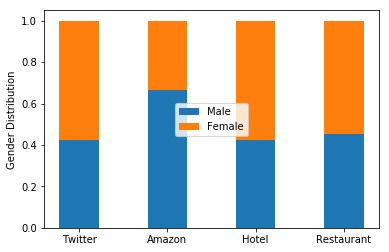

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# gender stacked bar chart
male = [0.425056, 0.666812, 0.423941, 0.45319]
female = [0.574944, 0.333188, 0.576059, 0.54681]
ind = np.arange(4)
width = 0.45

p1 = plt.bar(ind, male, width)
p2 = plt.bar(ind, female, width, bottom=male)

plt.ylabel('Gender Distribution')
plt.xticks(ind, ('Twitter', 'Amazon', 'Hotel', 'Restaurant'))
plt.legend((p1[0], p2[0]), ('Male', 'Female'), loc='center')

plt.show()

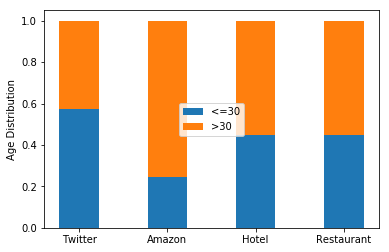

In [7]:
# age stacked bar chart
young = [0.571589, 0.244503, 0.450000, 0.450527]
old = [0.428411, 0.755497, 0.55, 0.549473]
ind = np.arange(4)
width = 0.45

p1 = plt.bar(ind, young, width)
p2 = plt.bar(ind, old, width, bottom=young)

plt.ylabel('Age Distribution')
plt.xticks(ind, ('Twitter', 'Amazon', 'Hotel', 'Restaurant'))
plt.legend((p1[0], p2[0]), ('<=30', '>30'), loc='center')

plt.show()

# Label Distribution

In [12]:
for datap in data_list:
    label_dist(datap)

Working on: ./twitter/twitter.tsv
0.0 0.692
1.0 0.308
Working on: ./amazon/amazon.tsv
1.0 0.029
2.0 0.041
3.0 0.087
4.0 0.234
5.0 0.609
Working on: ./yelp_hotel/yelp_hotel.tsv
1.0 0.196
2.0 0.124
3.0 0.164
4.0 0.273
5.0 0.243
Working on: ./yelp_rest/yelp_rest.tsv
1.0 0.11
2.0 0.098
3.0 0.142
4.0 0.279
5.0 0.37


# Summary
1. If we encode the data labels into positive (4,5) and negative (1,2,3). The Amazon data is very skewed distributed that the positive labels are much more than the negative labels (84.1% vs 15.9%). The skewed distribution problem also happens to the Yelp restaurant data (64.9% vs 35.1%) and the Twitter data (30.8% vs 69.2%). The only almost balanced data is the Yelp hotel data (51.6% vs 48.4%)

In [ ]:
# location distribution, visualize into maps
def loc_dist():
    pass